In [1]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np


In [2]:
 datasets.cifar10.load_data()

170508288/170498071 [==============================] - 4s 0us/step


((array([[[[ 59,  62,  63],
           [ 43,  46,  45],
           [ 50,  48,  43],
           ...,
           [158, 132, 108],
           [152, 125, 102],
           [148, 124, 103]],
  
          [[ 16,  20,  20],
           [  0,   0,   0],
           [ 18,   8,   0],
           ...,
           [123,  88,  55],
           [119,  83,  50],
           [122,  87,  57]],
  
          [[ 25,  24,  21],
           [ 16,   7,   0],
           [ 49,  27,   8],
           ...,
           [118,  84,  50],
           [120,  84,  50],
           [109,  73,  42]],
  
          ...,
  
          [[208, 170,  96],
           [201, 153,  34],
           [198, 161,  26],
           ...,
           [160, 133,  70],
           [ 56,  31,   7],
           [ 53,  34,  20]],
  
          [[180, 139,  96],
           [173, 123,  42],
           [186, 144,  30],
           ...,
           [184, 148,  94],
           [ 97,  62,  34],
           [ 83,  53,  34]],
  
          [[177, 144, 116],
           [16

In [3]:
(X_train, y_train), (X_test,y_test) = datasets.cifar10.load_data()
X_train.shape # here 50000 means training samples  # each sample is 32 by 32 image and 3 is color channel


(50000, 32, 32, 3)

In [6]:
X_test.shape  # In test we have 10000 image 

(10000, 32, 32, 3)

In [7]:
y_train.shape # 50000 sample and 1 dimensional array

(50000, 1)

In [8]:
y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [9]:
y_train= y_train.reshape(-1,)
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [ ]:
X_train[0] # we get 3 dimensional array 32 by 32

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]

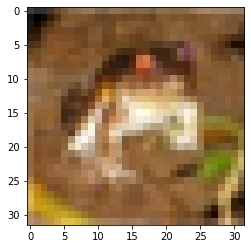

In [4]:
plt.imshow(X_train[0])

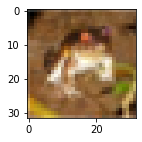

In [5]:
plt.figure(figsize = (15,2))
plt.imshow(X_train[0])

In [10]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

In [11]:
classes[9]

'truck'

In [12]:
def plot_sample(X,y, index):
  plt.figure(figsize = (15,2))
  plt.imshow(X[index])
  plt.xlabel(classes[y[index]])

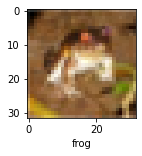

In [14]:
plot_sample(X_train, y_train, 0)

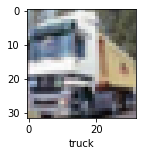

In [15]:
plot_sample(X_train, y_train, 1)

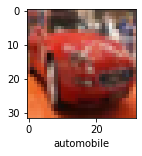

In [16]:
plot_sample(X_train, y_train, 5)

In [ ]:
#  Normalizing the training data

In [18]:
X_train = X_train / 255.0
X_test = X_test / 255.0

In [ ]:
# Build simple artificial neural network for image classification

In [20]:
ann = models.Sequential([
        layers.Flatten(input_shape=(32,32,3)), # 1st layer   
        layers.Dense(3000, activation='relu'), # 1st deep layer has 3000 neurons 
        layers.Dense(1000, activation='relu'), # 2nd Deep layer has 1000 neurons
        layers.Dense(10, activation='sigmoid') # last layer has 10 categories bcoz we have 10 classes   
    ])

ann.compile(optimizer='SGD',
              loss='sparse_categorical_crossentropy', # when we directly use value we use sparse categorical crossentopy
            
              metrics=['accuracy'])

ann.fit(X_train, y_train, epochs=5)

Epoch 1/5
1563/1563 [==============================] - 101s 64ms/step - loss: 1.8069 - accuracy: 0.3581
Epoch 2/5
1563/1563 [==============================] - 100s 64ms/step - loss: 1.6206 - accuracy: 0.4294
Epoch 3/5
1563/1563 [==============================] - 108s 69ms/step - loss: 1.5391 - accuracy: 0.4586
Epoch 4/5
1563/1563 [==============================] - 103s 66ms/step - loss: 1.4780 - accuracy: 0.4797
Epoch 5/5
1563/1563 [==============================] - 103s 66ms/step - loss: 1.4304 - accuracy: 0.4976


In [ ]:
from sklearn.metrics import confusion_matrix , classification_report
import numpy as np
y_pred = ann.predict(X_test)
y_pred_classes = [np.argmax(element) for element in y_pred]

print("Classification Report: \n", classification_report(y_test, y_pred_classes))

Classification Report: 
               precision    recall  f1-score   support

           0       0.42      0.72      0.53      1000
           1       0.65      0.58      0.61      1000
           2       0.27      0.55      0.37      1000
           3       0.44      0.17      0.24      1000
           4       0.46      0.32      0.38      1000
           5       0.48      0.27      0.35      1000
           6       0.49      0.53      0.51      1000
           7       0.45      0.66      0.54      1000
           8       0.70      0.47      0.56      1000
           9       0.70      0.38      0.49      1000

    accuracy                           0.46     10000
   macro avg       0.51      0.46      0.46     10000
weighted avg       0.51      0.46      0.46     10000



In [ ]:
# Now let us build a convolutional neural network to train our images

In [21]:
cnn = models.Sequential([
     #cnn # convolution means detecting the features 
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
   
    #dense 
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
    # difference b/w softmax and sigmoid is that soft max will normalize the probability.
   # 1:0.45
   # 2:0.67 
   # Softmax = 0.45/(0.45+0.67) + 0.67/(0.45+0.67)
])

In [22]:
cnn.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [23]:
cnn.fit(X_train, y_train, epochs=10)

Epoch 1/10
1563/1563 [==============================] - 65s 41ms/step - loss: 1.4556 - accuracy: 0.4789
Epoch 2/10
1563/1563 [==============================] - 65s 42ms/step - loss: 1.1034 - accuracy: 0.6137
Epoch 3/10
1563/1563 [==============================] - 62s 39ms/step - loss: 0.9752 - accuracy: 0.6577
Epoch 4/10
1563/1563 [==============================] - 61s 39ms/step - loss: 0.8886 - accuracy: 0.6920
Epoch 5/10
1563/1563 [==============================] - 62s 40ms/step - loss: 0.8202 - accuracy: 0.7138
Epoch 6/10
1563/1563 [==============================] - 67s 43ms/step - loss: 0.7667 - accuracy: 0.7351
Epoch 7/10
1563/1563 [==============================] - 62s 40ms/step - loss: 0.7113 - accuracy: 0.7522
Epoch 8/10
1563/1563 [==============================] - 62s 39ms/step - loss: 0.6728 - accuracy: 0.7657
Epoch 9/10
1563/1563 [==============================] - 62s 40ms/step - loss: 0.6299 - accuracy: 0.7804
Epoch 10/10
1563/1563 [==============================] - 62s 40m

In [ ]:
# With CNN, at the end 5 epochs, accuracy was at around 70% which is a 
# significant improvement over ANN. CNN's are best for image classification
# and gives superb accuracy. Also computation is much less compared to simple
#  ANN as maxpooling reduces the image dimensions while still preserving the features

In [24]:
cnn.evaluate(X_test,y_test)

313/313 [==============================] - 4s 12ms/step - loss: 0.9017 - accuracy: 0.7060


[0.9016603231430054, 0.7059999704360962]

In [25]:
y_test[:5]

array([[3],
       [8],
       [8],
       [0],
       [6]], dtype=uint8)

In [29]:
y_test = y_test.reshape(-1) # here we are converting it into 1 dimensional array
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

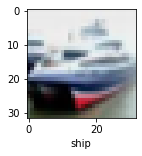

In [30]:
plot_sample(X_test, y_test, 1)

In [31]:
y_pred = cnn.predict(X_test)
y_pred[:5]

array([[5.65997470e-05, 5.40128021e-05, 3.18015955e-04, 9.50572371e-01,
        4.42961973e-05, 4.43670787e-02, 1.34025014e-03, 8.83244593e-06,
        1.62761989e-05, 3.22226970e-03],
       [3.54921110e-02, 4.35358938e-03, 1.65398043e-04, 3.35950244e-05,
        1.04743440e-05, 2.19103402e-08, 2.40501862e-07, 1.31717812e-07,
        9.58533108e-01, 1.41137640e-03],
       [1.56004891e-01, 6.03252947e-02, 7.16531230e-03, 9.56945270e-02,
        1.94144528e-02, 3.57466843e-03, 3.86972260e-03, 1.02262488e-02,
        5.20588577e-01, 1.23136334e-01],
       [8.21042120e-01, 5.85361198e-02, 3.02637834e-02, 2.64639352e-02,
        9.97131504e-03, 2.64802686e-04, 1.21455779e-02, 1.22379023e-03,
        3.37165520e-02, 6.37189578e-03],
       [2.23050074e-06, 5.36994543e-04, 7.23083839e-02, 2.00269017e-02,
        2.61102412e-02, 4.76677757e-04, 8.80362868e-01, 2.46980858e-06,
        1.72985689e-04, 2.42940700e-07]], dtype=float32)

In [32]:
y_classes = [np.argmax(element) for element in y_pred]
y_classes[:5]

[3, 8, 8, 0, 6]

In [33]:
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

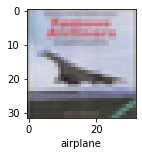

In [34]:
plot_sample(X_test, y_test,3)

In [35]:
classes

['airplane',
 'automobile',
 'bird',
 'cat',
 'deer',
 'dog',
 'frog',
 'horse',
 'ship',
 'truck']

In [36]:
classes[y_classes[3]] 

'airplane'

In [ ]:
classes[y_classes[3]]

In [37]:
print("Classification Report :\n", classification_report(y_test, y_classes))

NameError: ignored